In [2]:
from allensdk.core.nwb_data_set import NwbDataSet
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py 
import os
from matplotlib.backends.backend_pdf import PdfPages
import pickle as pkl
os.chdir('neuron_genetic_alg')
from config import *
os.chdir('../')

np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['agg.path.chunksize'] = 10000

# if you ran the examples above, you will have a NWB file here
cell_file_name = f'./model_responses/{model_num}.nwb'
cell_data_set = NwbDataSet(cell_file_name)

allen_file_name = f'./model_responses/{model_num}_allen_model_response_full_dt.nwb'
allen_data_set = NwbDataSet(allen_file_name)

sota_file_name = './compare_response2.hdf5'
sota_data_set = h5py.File(sota_file_name, 'r')

sweep_numbers = sorted(cell_data_set.get_experiment_sweep_numbers())

# # sampling rate is in Hz
#sampling_rate = sweep_data['sampling_rate']
#print(sampling_rate)


MONKEY PATCH HERE TO ADD PASSIVE STIMS AND REMOVE SOME ACTIVE
[b'68' b'51_2' b'6' b'4' b'58' b'59' b'47_3' b'50_3' b'53_3' b'66' b'48_2'
 b'38' b'47_2' b'44' b'46' b'50_1' b'8' b'21' b'16' b'23' b'34']


In [2]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

tick_major = 6
tick_minor = 4
plt.rcParams["xtick.major.size"] = tick_major
plt.rcParams["xtick.minor.size"] = tick_minor
plt.rcParams["ytick.major.size"] = tick_major
plt.rcParams["ytick.minor.size"] = tick_minor

font_small = 12
font_medium = 13
font_large = 14
plt.rc('font', size=font_small)          # controls default text sizes
plt.rc('axes', titlesize=font_medium)    # fontsize of the axes title
plt.rc('axes', labelsize=font_medium)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_small)    # legend fontsize
plt.rc('figure', titlesize=font_large)   # fontsize of the figure title

In [3]:
def cm_to_in(cm):
    return cm/2.54

def plot_stim_volts_pair(stim, volts, title_stim, title_volts, file_path_to_save=None):
    plt.figure(figsize=(cm_to_in(16), cm_to_in(12)))
    plt.subplot(2, 1, 1)
    plt.title(title_stim)
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (nA)')
    plt.plot(stim, color='black', linewidth=0.7)
    plt.subplot(2, 1, 2)
    plt.title('Voltage Response '+title_volts)
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (mV)')
    plt.plot(volts, color='black')
    plt.tight_layout(pad=1)
    plt.show()
    if file_path_to_save:
        plt.savefig(file_path_to_save+'.pdf', format='pdf', dpi=1000, bbox_inches="tight")

In [4]:
import h5py

initial_ind = 150000

short_sq_ind = [170000, 240000]
long_sq_ind = [initial_ind, 460000]
ramp_ind = [initial_ind, 1710000]
noise_ind_1 = [initial_ind, 1200000]
noise_ind_2 = [1900000, 2800000]
noise_ind_3 = [3500000, 4400000]
sq_0_5_ind = [initial_ind, 450000]
sq_2_ind = [initial_ind, 700000]



In [5]:
def filtr(lis, ind_lis):
    return lis[ind_lis[0]:ind_lis[1]]

def plot_sampled(sweep_number, stimulus, cell_response, allen_response, sota_response, dt):
    fig = plt.figure(figsize=(cm_to_in(40), cm_to_in(10)))
    plt.subplot(1, 3, 1)
    plt.title('Stim number '+str(sweep_number))
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (nA)')
    plt.plot(np.arange(len(stimulus))*dt, stimulus, color='black', linewidth=0.7)
    plt.subplot(1, 3, 2)
    plt.title('Allen\'s Model Response')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (mV)')
    plt.plot(np.arange(len(stimulus))*dt, cell_response, color='black')
    plt.plot(np.arange(len(stimulus))*dt, allen_response, color='crimson')
    plt.subplot(1, 3, 3)
    plt.title('CoMParE Model Response')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (mV)')
    plt.plot(np.arange(len(stimulus))*dt, cell_response, color='black')
    plt.plot(np.arange(len(stimulus))*dt, sota_response, color='crimson')
    plt.tight_layout(pad=1)
    plt.show()
    print('\n \n')
    return fig


In [6]:
def read_and_plot(sweep_list, save_path=None, pdf=None):
    if save_path:
        if os.path.isfile(save_path):
            os.remove(save_path)
        save_file = h5py.File(save_path, 'w')
        sweep_keys = []
    for sweep_number in sweep_list:
        sweep_data = cell_data_set.get_sweep(sweep_number)
        allen_sweep_data = allen_data_set.get_sweep(sweep_number)
        stimulus = sweep_data['stimulus']*10**9
        cell_response = sweep_data['response'][4000:]*10**3
        sampling_rate = sweep_data['sampling_rate']
        meta_data = cell_data_set.get_sweep_metadata(sweep_number)
        stim_kind = meta_data['aibs_stimulus_name']
        allen_response = allen_sweep_data['response'][4000:]*10**3
        sota_response = sota_data_set[str(sweep_number)+'_response'][:]
        sota_dt = sota_data_set[str(sweep_number)+'_dt'][:]
        print('sota dt :', sota_dt, 'sampling rate:', sampling_rate)
        print('Stim kind: '+stim_kind)
        if 'Test' in stim_kind:
            print('Test:', sweep_number)
        if 'Short Square' in stim_kind:
            stimulus = filtr(stimulus, short_sq_ind)
            cell_response = filtr(cell_response, short_sq_ind)
            allen_response = filtr(allen_response, short_sq_ind)
            sota_response = filtr(sota_response, short_sq_ind)
        if 'Long Square' in stim_kind:
            stimulus = filtr(stimulus, long_sq_ind)
            cell_response = filtr(cell_response, long_sq_ind)
            allen_response = filtr(allen_response, long_sq_ind)
            sota_response = filtr(sota_response, long_sq_ind)
        if 'Ramp' in stim_kind:
            stimulus = filtr(stimulus, ramp_ind)
            cell_response = filtr(cell_response, ramp_ind)
            allen_response = filtr(allen_response, ramp_ind)
            sota_response = filtr(sota_response, ramp_ind)
        if 'Square - 0.5ms Subthreshold' in stim_kind:
            stimulus = filtr(stimulus, sq_0_5_ind)
            cell_response = filtr(cell_response, sq_0_5_ind)
            allen_response = filtr(allen_response, sq_0_5_ind)
            sota_response = filtr(sota_response, sq_0_5_ind)
        if 'Square - 2s Suprathreshold' in stim_kind:
            stimulus = filtr(stimulus, sq_2_ind)
            cell_response = filtr(cell_response, sq_2_ind)
            allen_response = filtr(allen_response, sq_2_ind)
            sota_response = filtr(sota_response, sq_2_ind)
        if not 'Noise' in stim_kind and not 'Test' in stim_kind:
            fig = plot_sampled(sweep_number, stimulus, cell_response, allen_response, sota_response, sota_dt)
            if save_path:
                save_file.create_dataset(str(sweep_number)+'_stimulus', data=stimulus)
                save_file.create_dataset(str(sweep_number)+'_cell_response', data=cell_response)
                save_file.create_dataset(str(sweep_number)+'_allen_model_response', data=allen_response)
                save_file.create_dataset(str(sweep_number)+'_compare_model_response', data=sota_response)
                save_file.create_dataset(str(sweep_number)+'_dt', data=np.array([1/sampling_rate*1000]))
                sweep_keys.append(str(sweep_number))
            if pdf:
                pdf.savefig(fig)
                plt.close(fig)
        if 'Noise' in stim_kind:
            stimulus1 = filtr(stimulus, noise_ind_1)
            cell_response1 = filtr(cell_response, noise_ind_1)
            allen_response1 = filtr(allen_response, noise_ind_1)
            sota_response1 = filtr(sota_response, noise_ind_1)
            stimulus2 = filtr(stimulus, noise_ind_2)
            cell_response2 = filtr(cell_response, noise_ind_2)
            allen_response2 = filtr(allen_response, noise_ind_2)
            sota_response2 = filtr(sota_response, noise_ind_2)
            stimulus3 = filtr(stimulus, noise_ind_3)
            cell_response3 = filtr(cell_response, noise_ind_3)
            allen_response3 = filtr(allen_response, noise_ind_3)
            sota_response3 = filtr(sota_response, noise_ind_3)
            fig1 = plot_sampled(sweep_number, stimulus1, cell_response1, allen_response1, sota_response1, sota_dt)
            fig2 = plot_sampled(sweep_number, stimulus2, cell_response2, allen_response2, sota_response2, sota_dt)
            fig3 = plot_sampled(sweep_number, stimulus3, cell_response3, allen_response3, sota_response3, sota_dt)
            if save_path:
                save_file.create_dataset(str(sweep_number)+'_1_stimulus', data=stimulus1)
                save_file.create_dataset(str(sweep_number)+'_1_cell_response', data=cell_response1)
                save_file.create_dataset(str(sweep_number)+'_1_allen_model_response', data=allen_response1)
                save_file.create_dataset(str(sweep_number)+'_1_compare_model_response', data=sota_response1)
                save_file.create_dataset(str(sweep_number)+'_1_dt', data=np.array([1/sampling_rate*1000]))
                save_file.create_dataset(str(sweep_number)+'_2_stimulus', data=stimulus2)
                save_file.create_dataset(str(sweep_number)+'_2_cell_response', data=cell_response2)
                save_file.create_dataset(str(sweep_number)+'_2_allen_model_response', data=allen_response2)
                save_file.create_dataset(str(sweep_number)+'_2_compare_model_response', data=sota_response2)
                save_file.create_dataset(str(sweep_number)+'_2_dt', data=np.array([1/sampling_rate*1000]))
                save_file.create_dataset(str(sweep_number)+'_3_stimulus', data=stimulus3)
                save_file.create_dataset(str(sweep_number)+'_3_cell_response', data=cell_response3)
                save_file.create_dataset(str(sweep_number)+'_3_allen_model_response', data=allen_response3)
                save_file.create_dataset(str(sweep_number)+'_3_compare_model_response', data=sota_response3)
                save_file.create_dataset(str(sweep_number)+'_3_dt', data=np.array([1/sampling_rate*1000]))
                sweep_keys.append(str(sweep_number)+'_1')
                sweep_keys.append(str(sweep_number)+'_2')
                sweep_keys.append(str(sweep_number)+'_3')
            if pdf:
                pdf.savefig(fig1)
                plt.close(fig1)
                pdf.savefig(fig2)
                plt.close(fig2)
                pdf.savefig(fig2)
                plt.close(fig2)
    if save_path:
        save_file.create_dataset('sweep_numbers', data=np.array(sweep_list))
        save_file.create_dataset('sweep_keys', data=np.array([np.string_(e) for e in sweep_keys]))
        save_file.close()

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Ramp


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


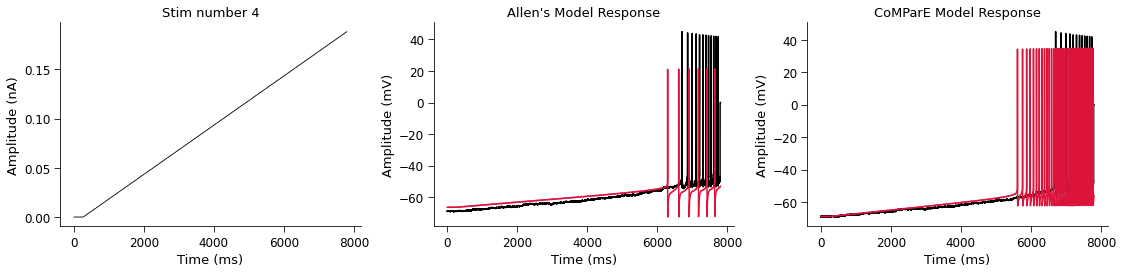

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Ramp


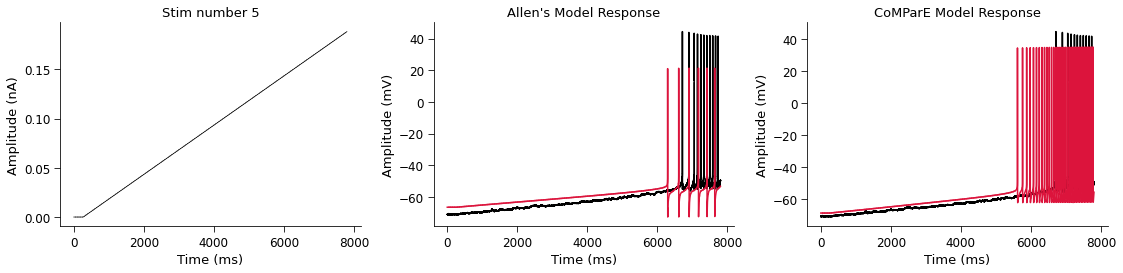

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Ramp


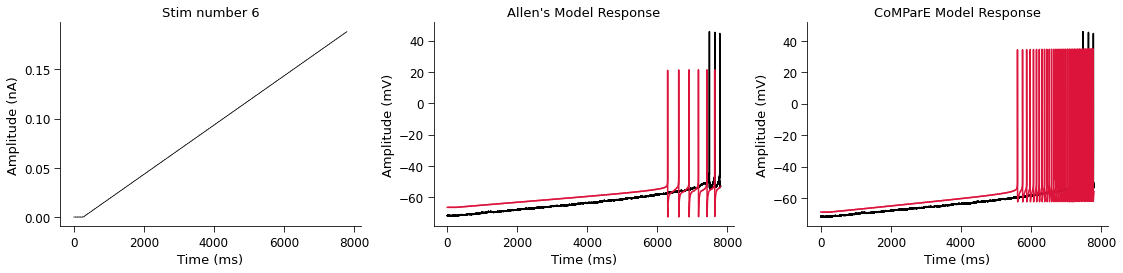

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


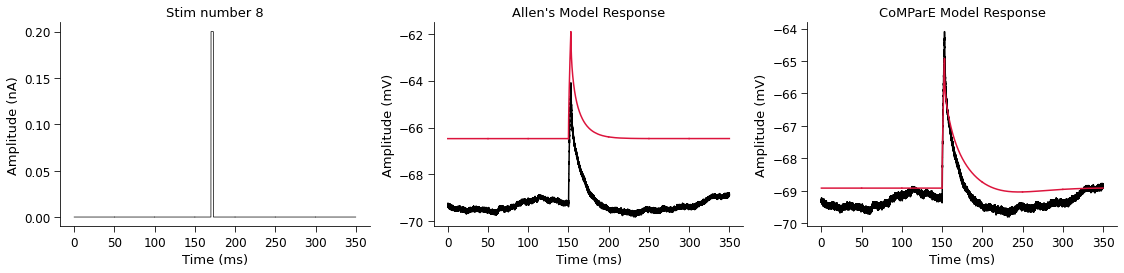

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


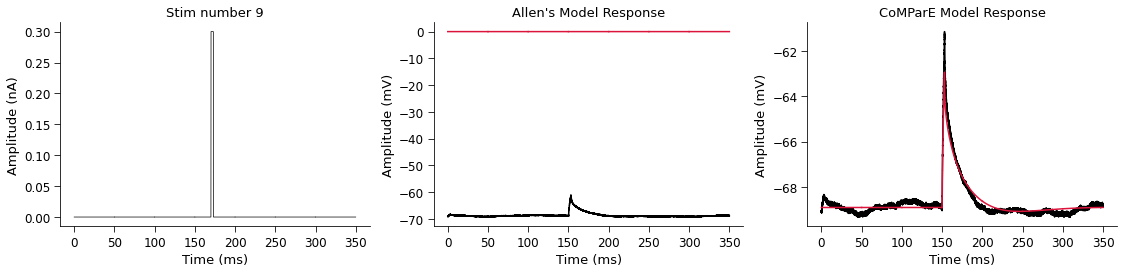

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


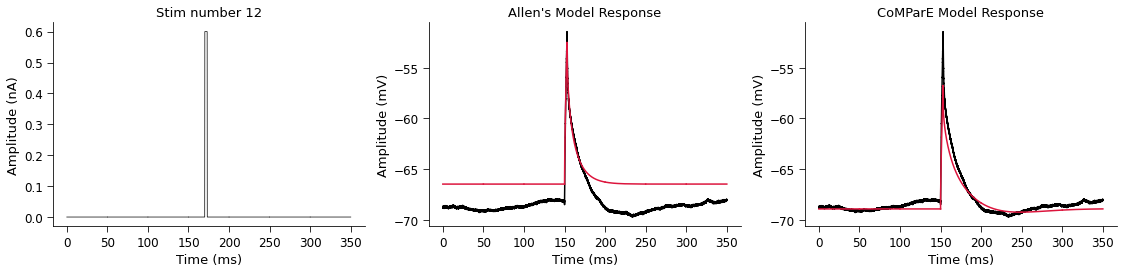

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


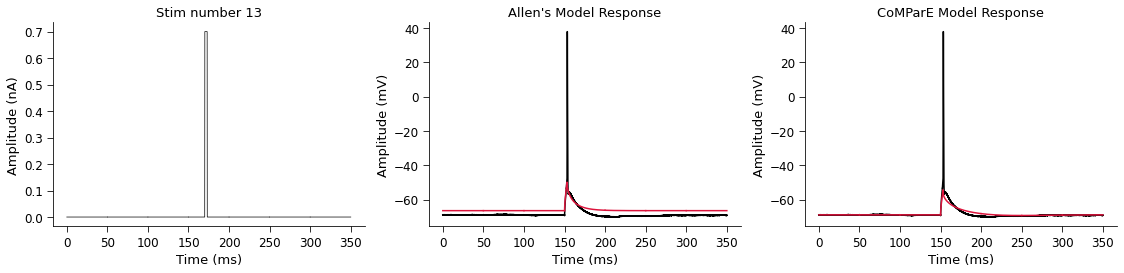

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


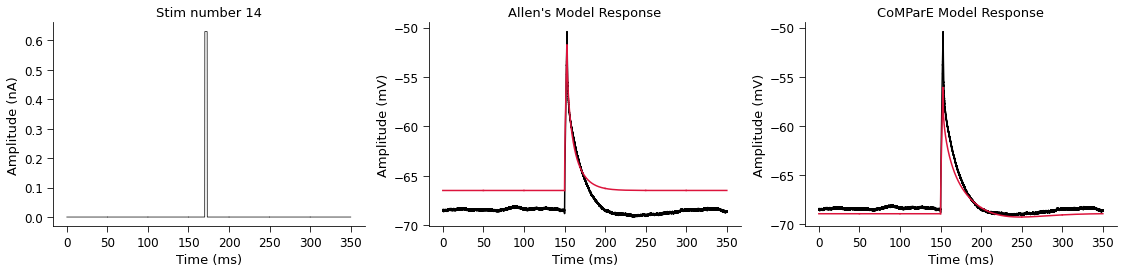

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


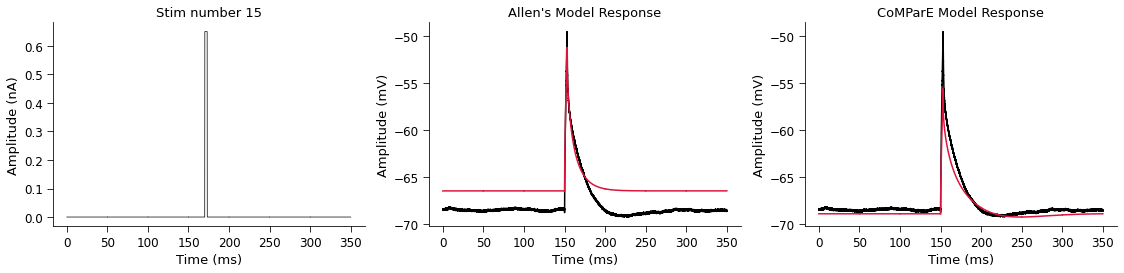

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


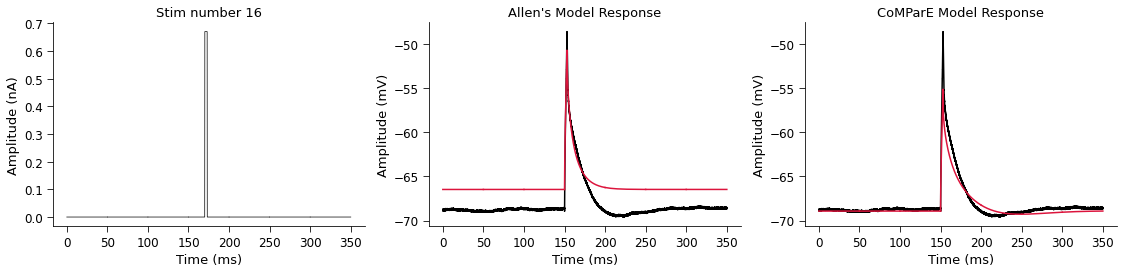

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


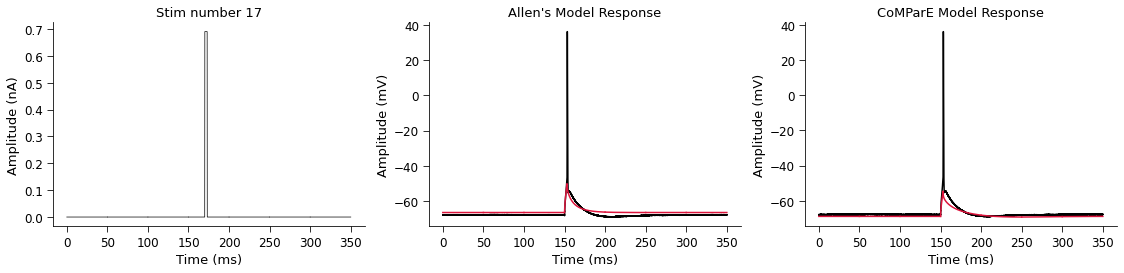

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


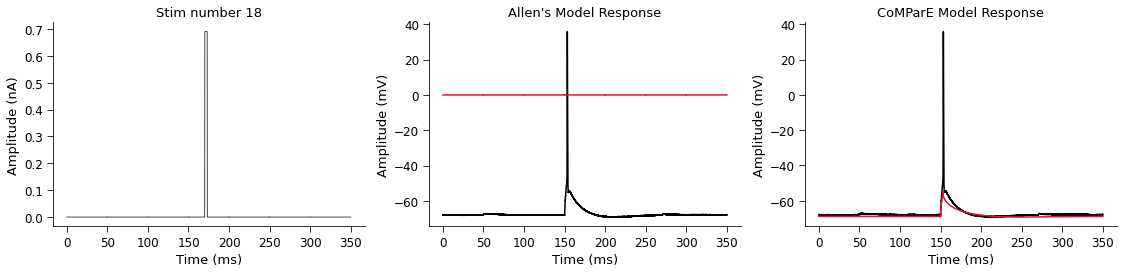

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


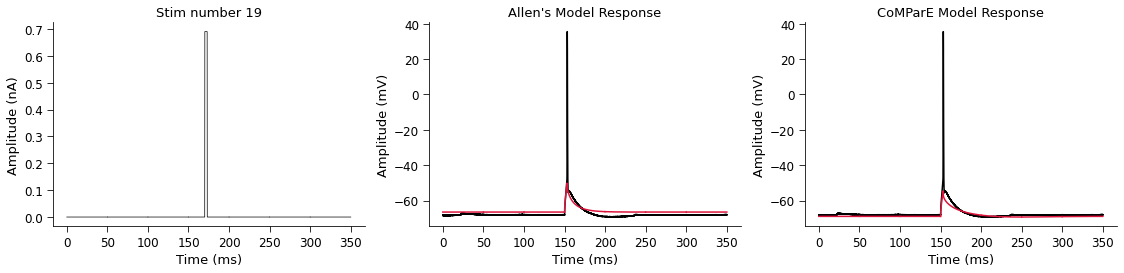

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


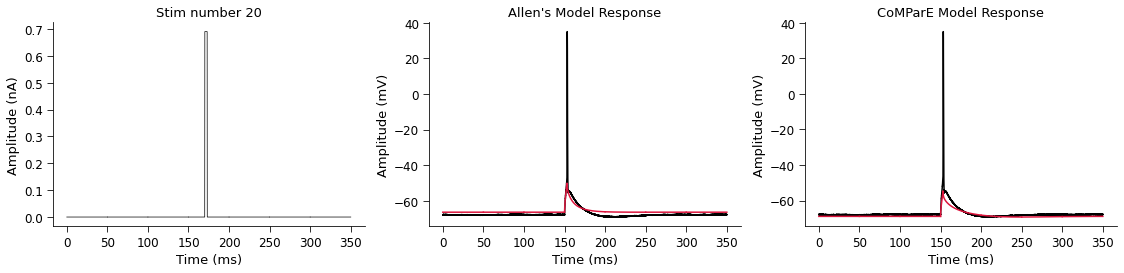

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Short Square


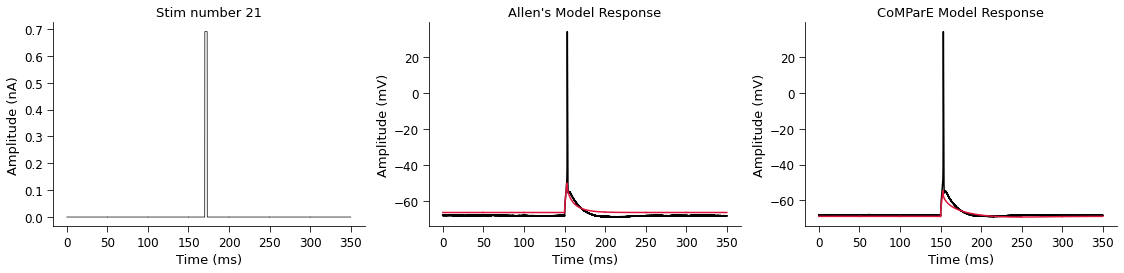

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Long Square


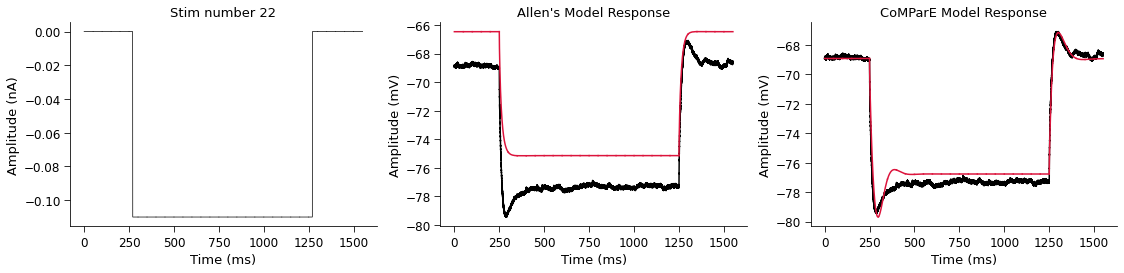

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Long Square


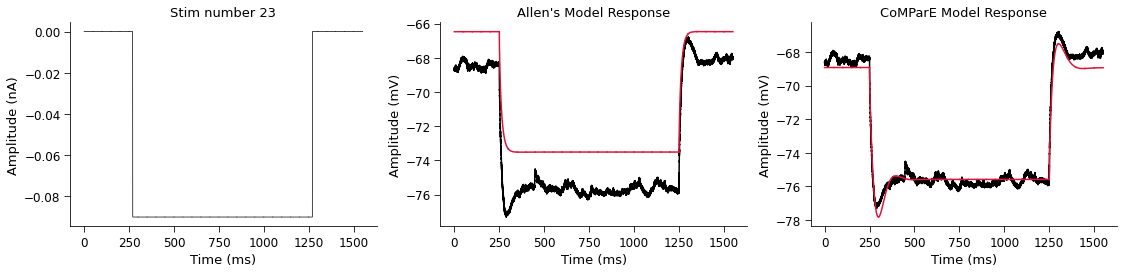

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Long Square


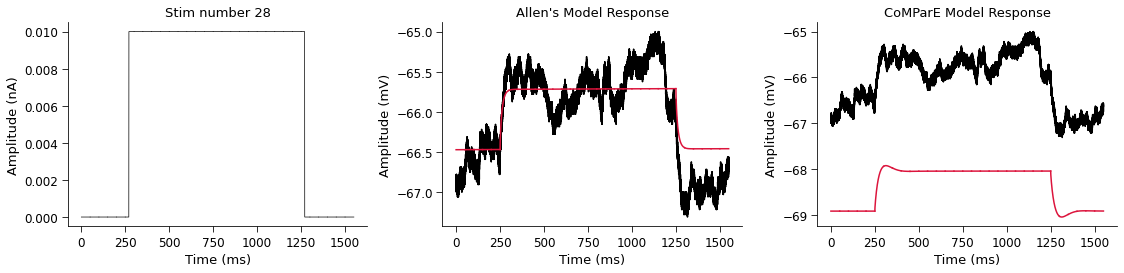

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Long Square


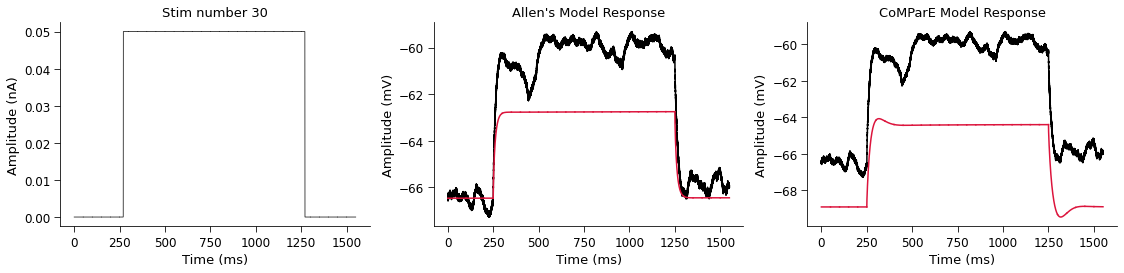

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Long Square


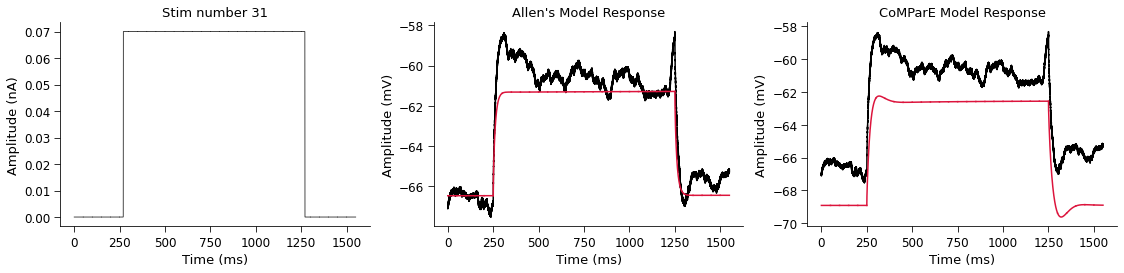

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Long Square


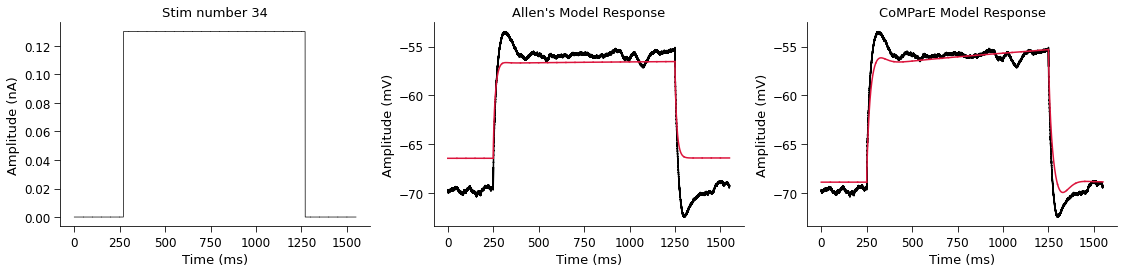

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Long Square


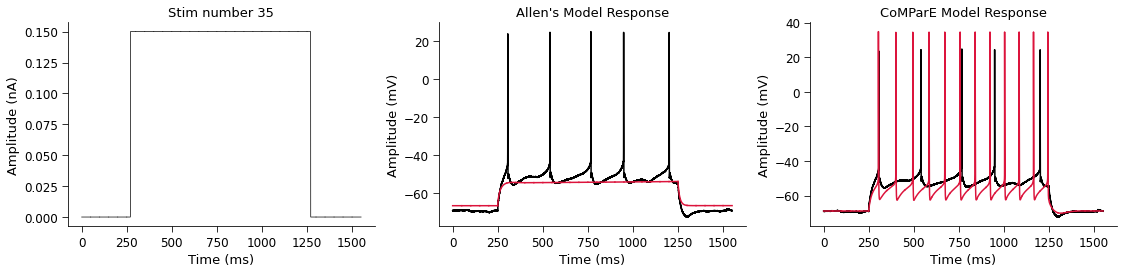

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Long Square


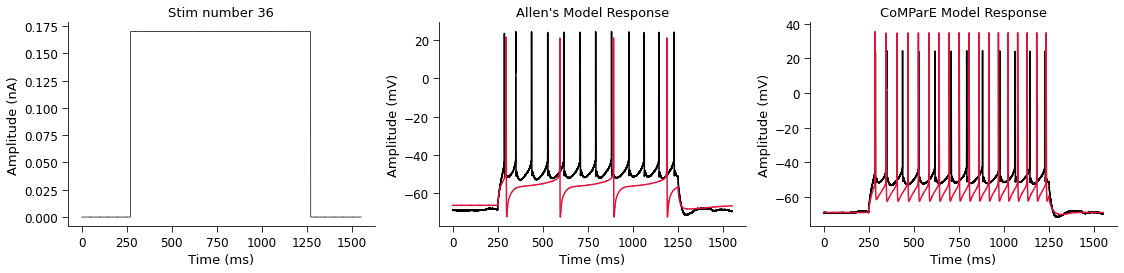

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Long Square


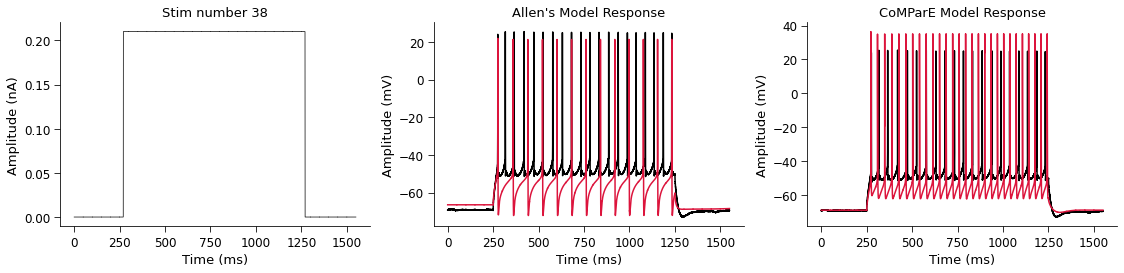

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Long Square


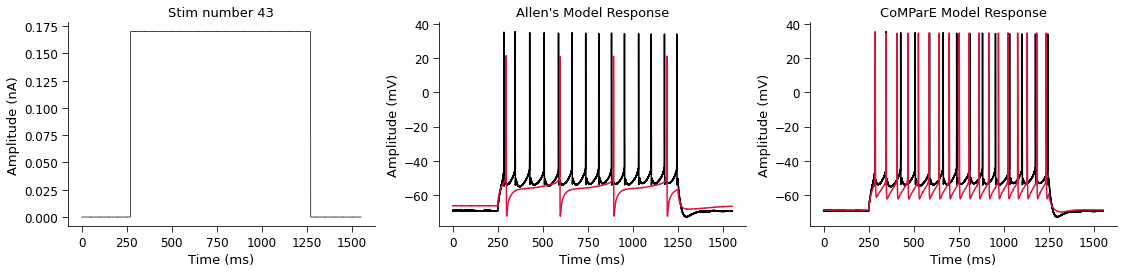

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Long Square


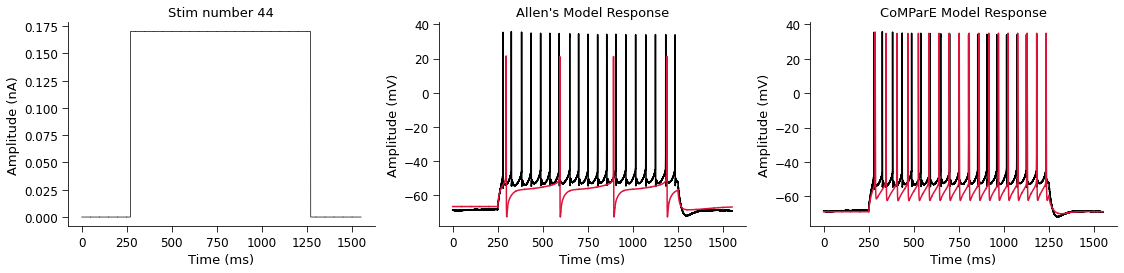

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Long Square


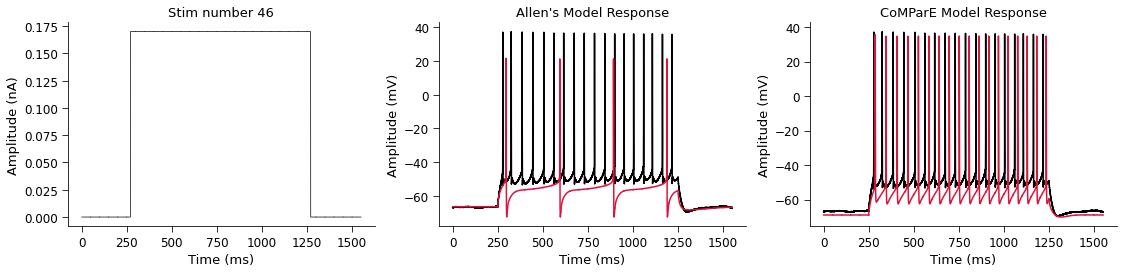

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Noise 1


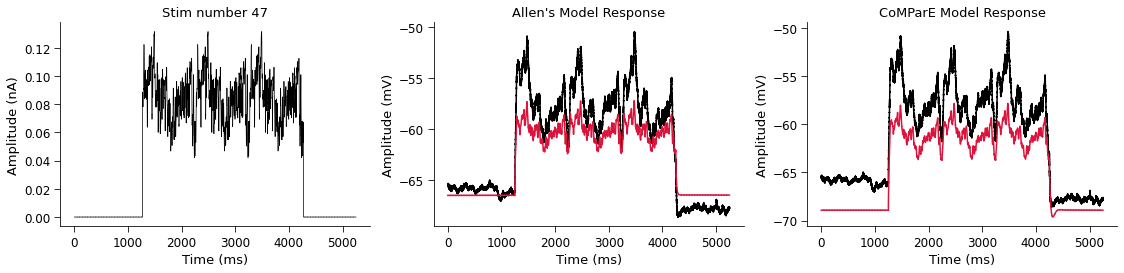

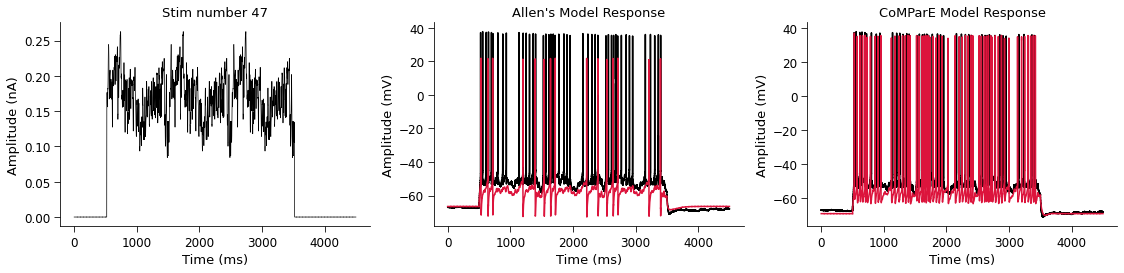

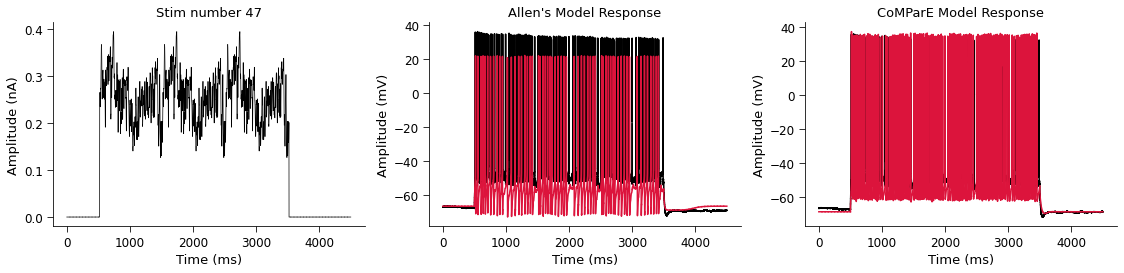

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Noise 2


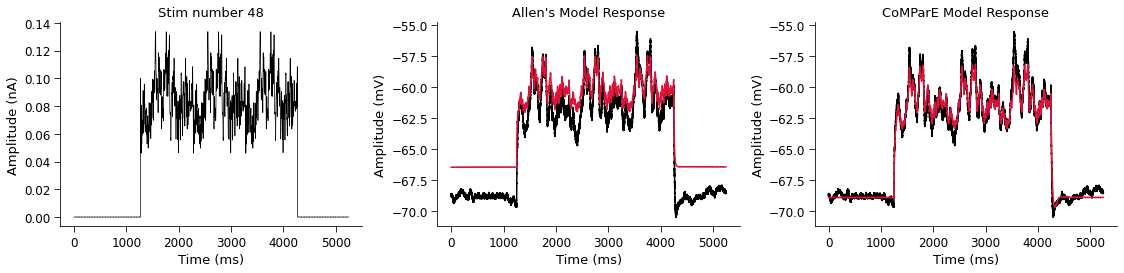

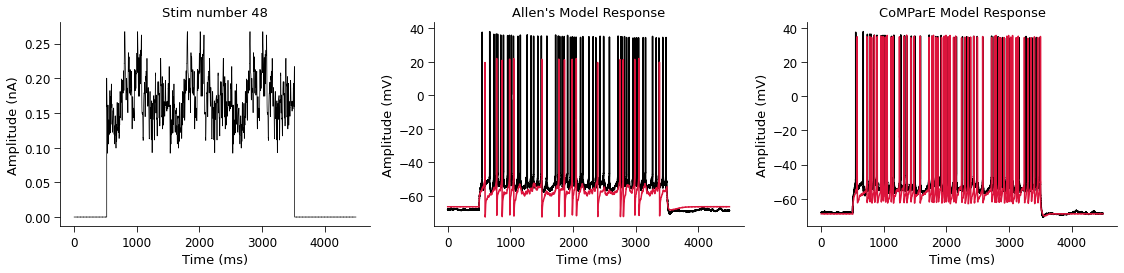

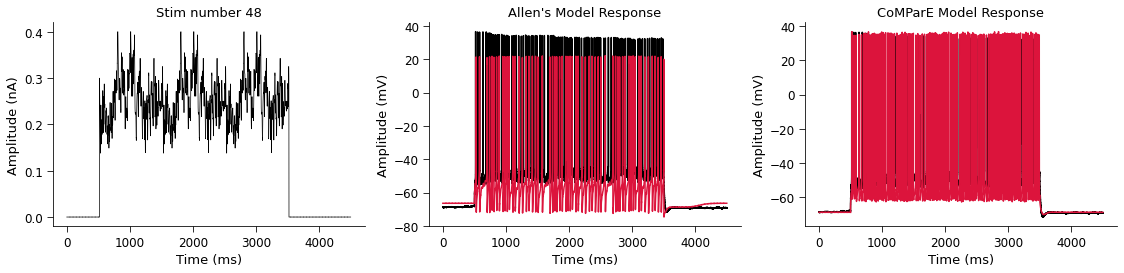

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Noise 2


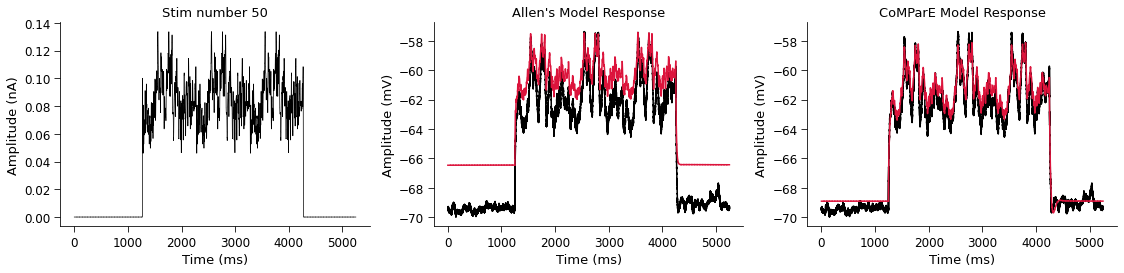

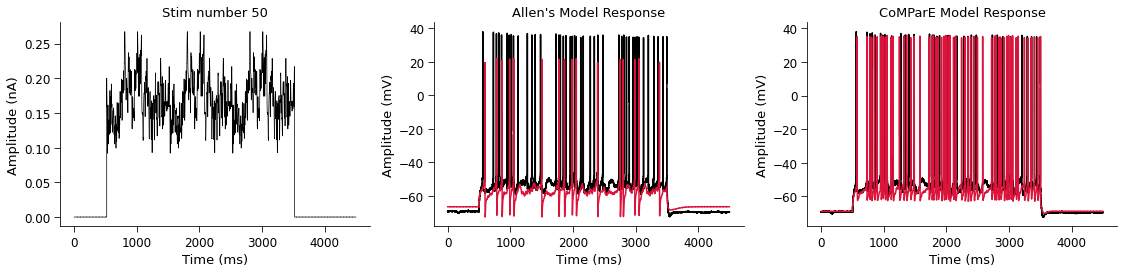

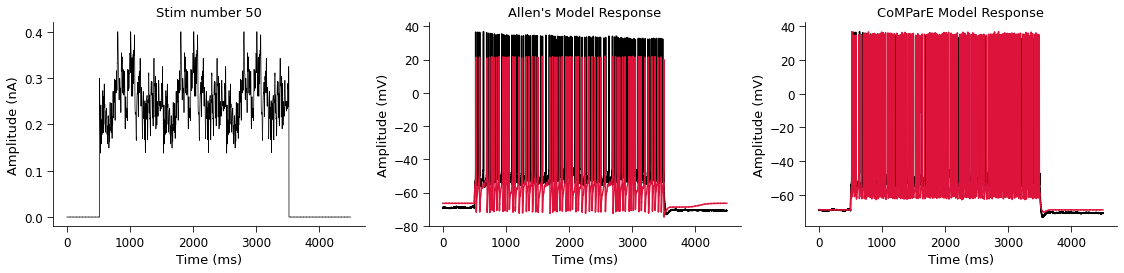

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Noise 1


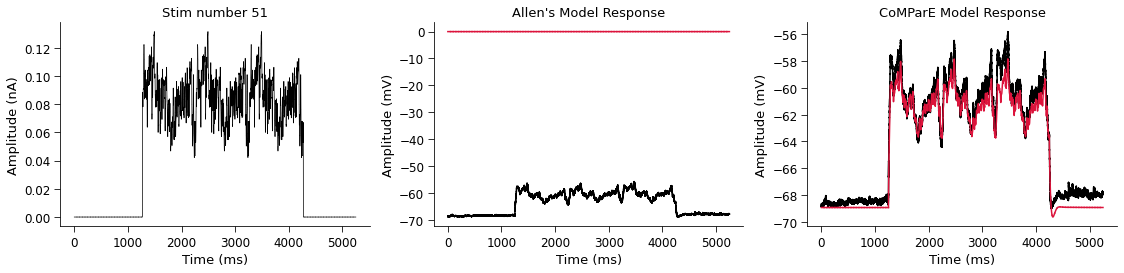

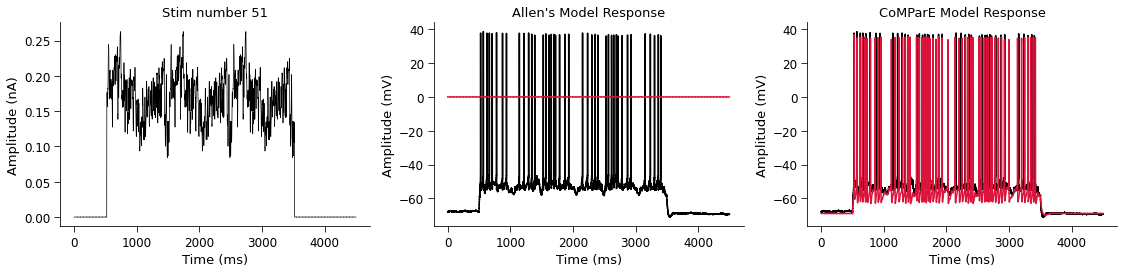

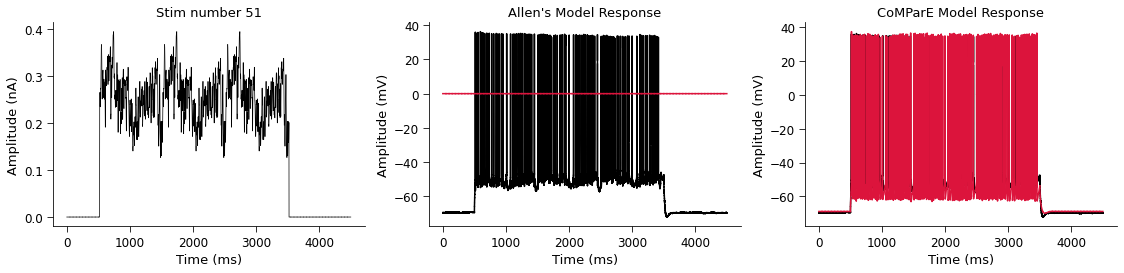

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Noise 1


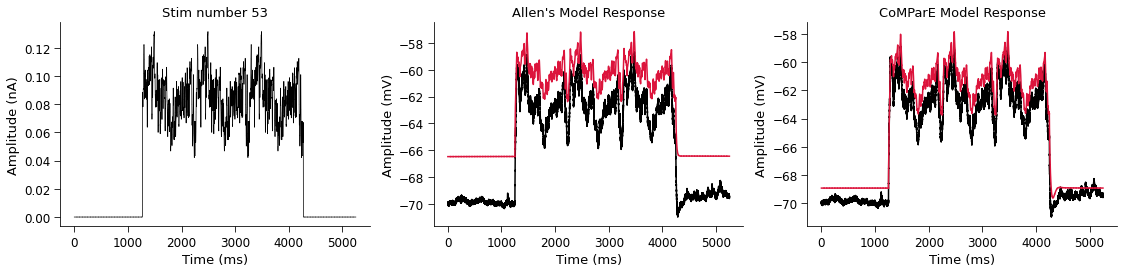

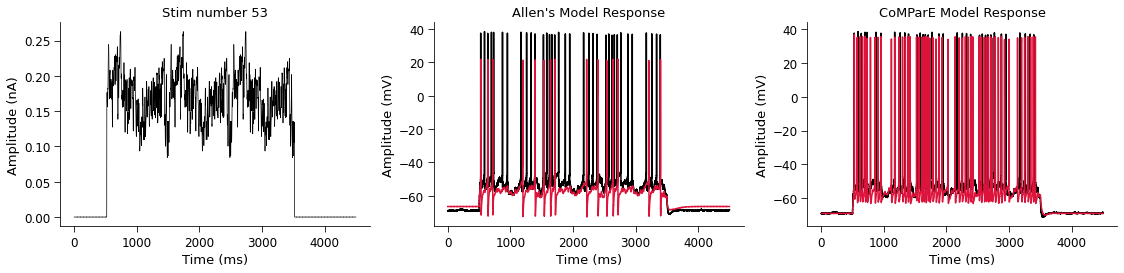

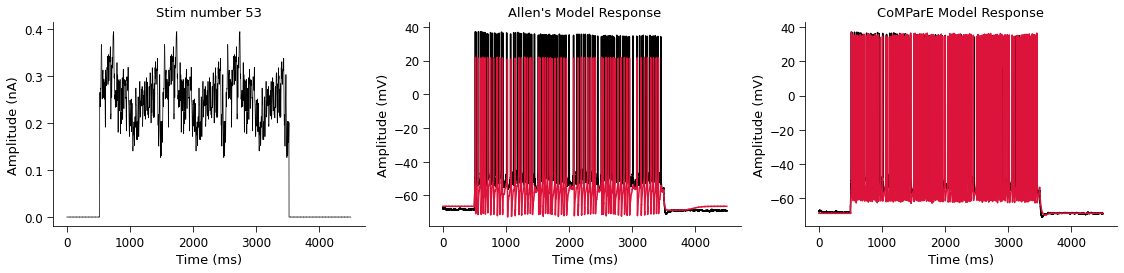

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Square - 0.5ms Subthreshold


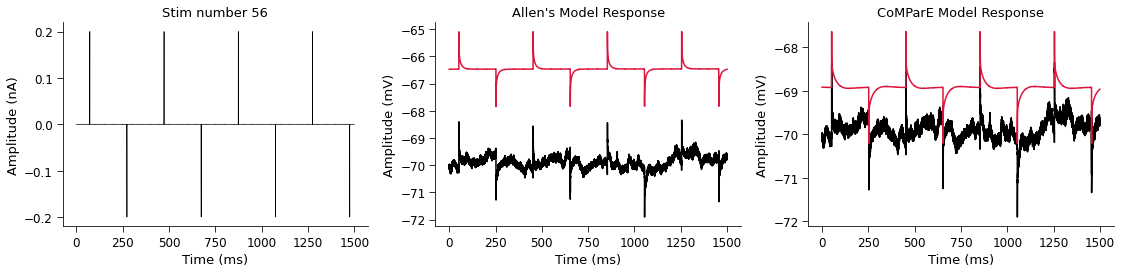

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Square - 0.5ms Subthreshold


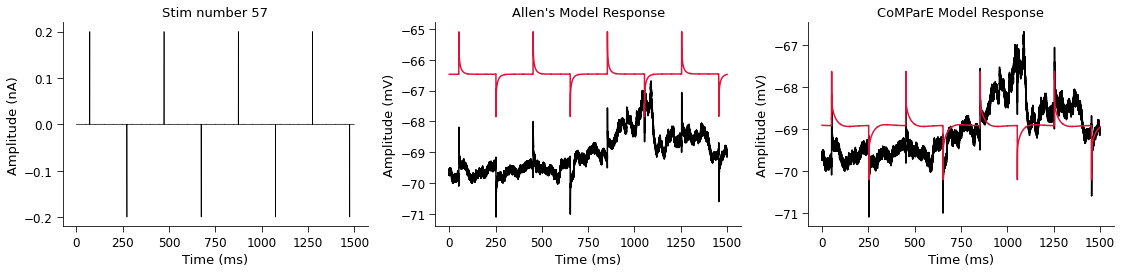

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Square - 2s Suprathreshold


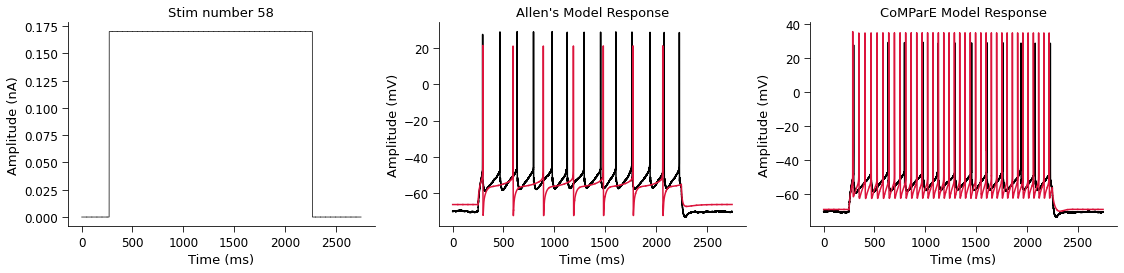

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Square - 2s Suprathreshold


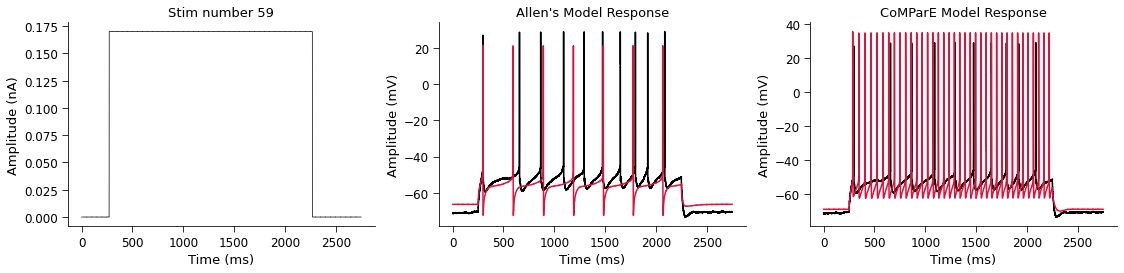

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Square - 2s Suprathreshold


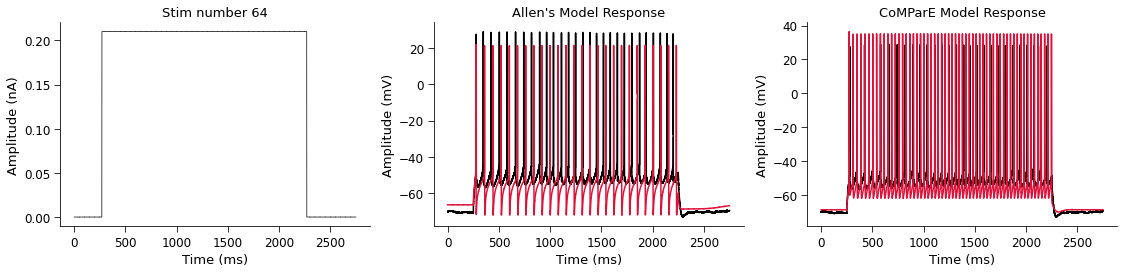

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Square - 2s Suprathreshold


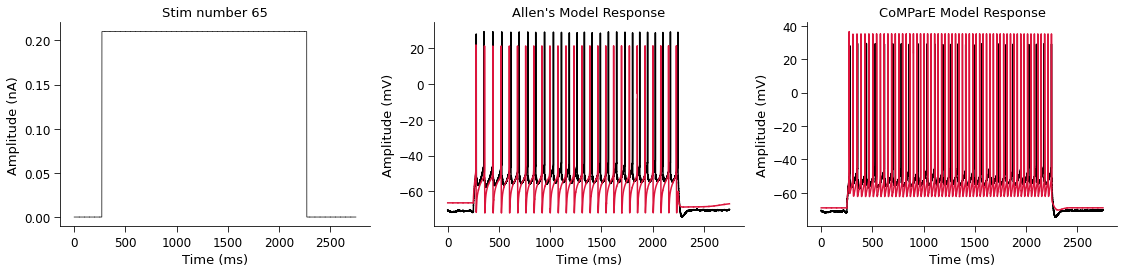

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Square - 2s Suprathreshold


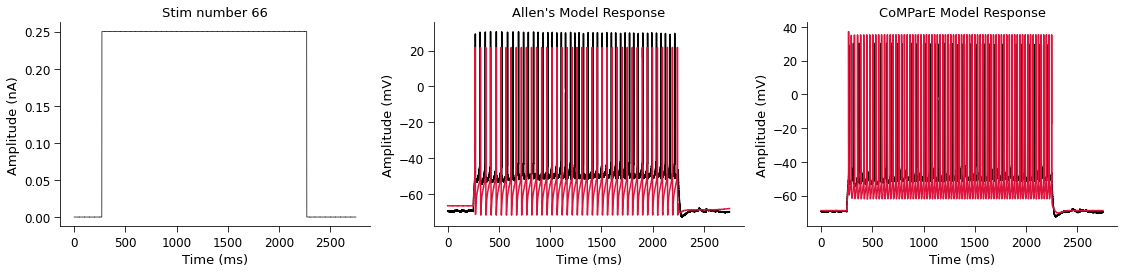

/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Square - 2s Suprathreshold


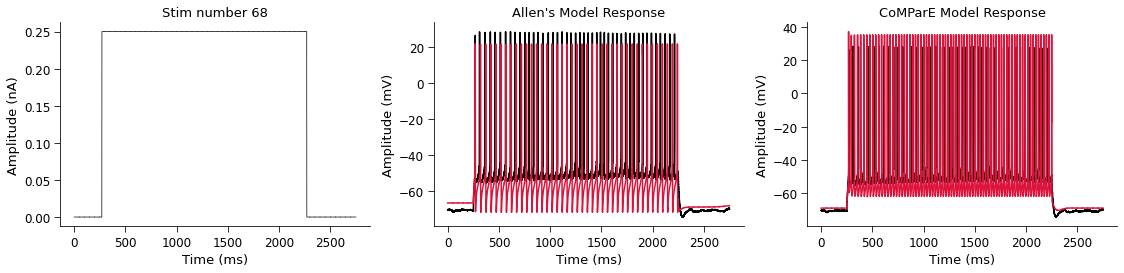


 

sota dt : [0.005] sampling rate: 200000.0
Stim kind: Test
Test: 72


/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/global/cscratch1/sd/zladd/conda/dot_env/lib/python3.8/s

In [7]:
# # Save parsed stimulus and responses
pdf = PdfPages('comparison.pdf')
parsed_stim_response_path = f'./allen_model_sota_model_parsed_cell_{model_num}.hdf5'
read_and_plot(sweep_numbers, parsed_stim_response_path, pdf)
pdf.close()

In [7]:
def eval_efel(feature_name, target, data, dt):
    def diff_lists(lis1, lis2):
        def safe_mean(lis):
            if np.size(lis) == 0:
                return 0
            return np.mean(lis)
        if lis1 is None and lis2 is None:
            return 0
        if lis1 is None:
            lis1 = [0]
        if lis2 is None:
            lis2 = [0]
        len1, len2 = len(lis1), len(lis2)
        if len1 > len2:
            lis2 = np.concatenate((lis2, np.zeros(len1 - len2)), axis=0)
        if len2 > len1:
            lis1 = np.concatenate((lis1, np.zeros(len2 - len1)), axis=0)
        return np.sqrt(safe_mean((lis1 - lis2)**2))
    time_stamps = len(target)
    time = np.cumsum([dt for i in range(time_stamps)])
    curr_trace_target, curr_trace_data = {}, {}
    stim_start, stim_end = dt, time_stamps*dt
    curr_trace_target['T'], curr_trace_data['T'] = time, time
    curr_trace_target['V'], curr_trace_data['V'] = target, data
    curr_trace_target['stim_start'], curr_trace_data['stim_start'] = [stim_start], [stim_start]
    curr_trace_target['stim_end'], curr_trace_data['stim_end'] = [stim_end], [stim_end]
    traces = [curr_trace_target, curr_trace_data]
    traces_results = efel.getFeatureValues(traces, [feature_name], raise_warnings=False)
    diff_feature = diff_lists(traces_results[0][feature_name], traces_results[1][feature_name])
    return diff_feature, traces_results

In [18]:
# Read saved file fresh
parsed_stim_response_path = f'./allen_model_sota_model_parsed_cell_{model_num}.hdf5'
data_file = h5py.File(parsed_stim_response_path, 'r')
sweep_keys = [e.decode('ascii') for e in data_file['sweep_keys']]

In [8]:
# Adjust which features and stims we want to compute
import efel
all_features = efel.api.getFeatureNames()

In [9]:
def show_efel(efel_feature_dict, feature_names):
    def normalize_efel_score(cell_features, allen_features, compare_features):
        cell_feature_mean = np.mean(cell_features)
        if cell_feature_mean != 0:
            return np.array(cell_features)/cell_feature_mean, np.array(allen_features)/cell_feature_mean,\
                    np.array(compare_features)/cell_feature_mean 
        else:
            return np.array(cell_features), np.array(allen_features), np.array(compare_features) 
    #feature_names = list(efel_feature_dict.keys())
    width=0.4
    fig, ax = plt.subplots(figsize=(15, 5))
    for i, l in enumerate(feature_names):
        efel_data = efel_feature_dict[l]
        cell_features, allen_features, compare_features = efel_data["cell_features"], efel_data["allen_features"], efel_data["compare_features"]
        if cell_features is None or len(cell_features)==0:
            cell_features = [0]
            continue
        if allen_features is None or len(allen_features)==0:
            allen_features = [0]
            continue
        if compare_features is None or len(compare_features)==0:
            compare_features = [0]
            continue
        x_cell = np.ones(len(cell_features))*i + (np.random.rand(len(cell_features))*width/3.-width/3.)
        x_allen = np.ones(len(allen_features))*i + (np.random.rand(len(allen_features))*width/3.)
        x_compare = np.ones(len(compare_features))*i + (np.random.rand(len(compare_features))*width/3.+width/3.)
        cell_features, allen_features, compare_features = normalize_efel_score(cell_features, allen_features, compare_features)
        ax.scatter(x_cell, cell_features, color="black", s=25)
        ax.scatter(x_allen, allen_features, color="blue", s=25)
        ax.scatter(x_compare, compare_features, color="crimson", s=25)

    ax.set_xticks(range(len(feature_names)))
    ax.set_xticklabels(feature_names, rotation=90)
    ax.scatter([], [], color="black", label="Cell response")
    ax.scatter([], [], color="blue", label="Allen's model response")
    ax.scatter([], [], color="crimson", label="CoMPare model response")
    ax.legend(bbox_to_anchor=(1.5, 1))
    plt.show()

def grade_efel(efel_feature_dict, draw_feature_names, pdf):
    def normalize_efel_score(cell_features, allen_features, compare_features):
        cell_feature_mean = np.mean(cell_features)
        if cell_feature_mean != 0:
            return np.array(cell_features)/cell_feature_mean, np.array(allen_features)/cell_feature_mean,\
                    np.array(compare_features)/cell_feature_mean 
        else:
            return np.array(cell_features), np.array(allen_features), np.array(compare_features) 
    feature_names = list(efel_feature_dict.keys())
    width=0.4
    fig, ax = plt.subplots(figsize=(15, 5))
    max_score = 0
    allen_score = 0 
    compare_score = 0
    
    for i, l in enumerate(feature_names):
        efel_data = efel_feature_dict[l]
        cell_features, allen_features, compare_features = efel_data["cell_features"], efel_data["allen_features"], efel_data["compare_features"]
        if cell_features is None or len(cell_features)==0:
            cell_features = [0]
            continue
        if allen_features is None or len(allen_features)==0:
            allen_features = [0]
            continue
        if compare_features is None or len(compare_features)==0:
            compare_features = [0]
            continue
        x_cell = np.ones(len(cell_features))*i + (np.random.rand(len(cell_features))*width/3.-width/3.)
        x_allen = np.ones(len(allen_features))*i + (np.random.rand(len(allen_features))*width/3.)
        x_compare = np.ones(len(compare_features))*i + (np.random.rand(len(compare_features))*width/3.+width/3.)
        cell_features, allen_features, compare_features = normalize_efel_score(cell_features, allen_features, compare_features)
        if l in draw_feature_names:
            ax.scatter(x_cell, cell_features, color="black", s=25)
            ax.scatter(x_allen, allen_features, color="blue", s=25)
            ax.scatter(x_compare, compare_features, color="crimson", s=25)
        if len(allen_features) > 0 and len(cell_features) > 1 and len(compare_features) > 1:
            max_score += 1 #np.mean(cell_features)
            allen_score += 1 - np.abs(1 - np.nanmean(allen_features))
            compare_score += 1 - np.abs(1 - np.nanmean(compare_features))

    ax.set_xticks(range(len(draw_feature_names)))
    ax.set_xticklabels(draw_feature_names, rotation=90)
    ax.scatter([], [], color="black", label="Cell response")
    ax.scatter([], [], color="blue", label="Allen's model response")
    ax.scatter([], [], color="crimson", label="CoMPare model response")
    ax.legend(bbox_to_anchor=(1.5, 1))
    pdf.savefig(fig, bbox_inches='tight')
    plt.close(fig)
    return max_score, allen_score, compare_score

    
    
    
    

In [14]:
efel_data = pkl.load(open(f'./efel_data/efel_dataset_model_{model_num}.pkl', 'rb'))

In [15]:
selected_efel_names = efel.api.getFeatureNames()[:5]
print(selected_efel_names)

['AHP1_depth_from_peak', 'AHP2_depth_from_peak', 'AHP_depth', 'AHP_depth_abs', 'AHP_depth_abs_slow']


In [19]:
total_possible = []
allen_scores = []
compare_scores = []
pdf = PdfPages('efel_comparison.pdf')
for sweep_key in sweep_keys:
    try:
        efel_feature_dict = efel_data[sweep_key]
        max_score, allen_score, compare_score = grade_efel(efel_feature_dict, selected_efel_names, pdf)
        if not allen_score:
            print(sweep_key)
        total_possible.append(max_score)
        allen_scores.append(allen_score)
        compare_scores.append(compare_score)
    except KeyError:
        total_possible.append(0)
        allen_scores.append(0)
        compare_scores.append(0)
        continue
pdf.close()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


In [20]:
allen_scores = np.array(allen_scores)
total_possible = np.array(total_possible)
compare_scores = np.array(compare_scores)
curr_sweep_keys =  np.array(sweep_keys)

remove_inds = (total_possible == 0) | (allen_scores < 0) | (compare_scores < 0)
compare_scores = compare_scores[~remove_inds]
total_possible = total_possible[~remove_inds]
allen_scores = allen_scores[~remove_inds]
curr_sweep_keys = curr_sweep_keys[~remove_inds]

In [21]:
allen_grades = (allen_scores/total_possible) * 100
compare_grades = (compare_scores/total_possible) * 100

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


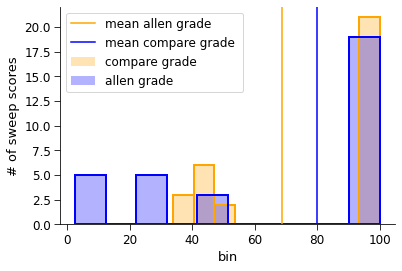

In [22]:

fig = plt.figure()
ax = plt.gca()

plt.hist(compare_grades, alpha=.3, color='orange', label = 'compare grade')
plt.hist(allen_grades, alpha=.3, color='blue', label = 'allen grade')

plt.hist(compare_grades,  edgecolor='orange', facecolor="None", linewidth=2)
plt.hist(allen_grades,  facecolor="None", edgecolor='blue', linewidth=2)

ax.axvline(np.mean(allen_grades), color='orange', label = 'mean allen grade ')
ax.axvline(np.mean(compare_grades), color='blue', label = 'mean compare grade ')
plt.ylabel('# of sweep scores')
plt.xlabel('bin')
plt.legend()


In [23]:
np.mean(allen_grades), np.mean(compare_grades)

(68.60168474533717, 79.91294750599062)

In [19]:
data_file.close()


AttributeError: 'NwbDataSet' object has no attribute 'close'